In this project we'll be looking at the earnings of recent college graduates based on each major in 'recent-grads.csv'. This dataset is based of students who graduated from college between 2010 and 2012 and from American Community Survey 2010-2012 Public Use Microdata Series. We'll use histograms, bar plots and scatter plots to visualise the data and see what van be drawn from the results. The main purpose of this project is to practice some of the data visualisation tools that are on offer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The code below ensures the plots are displayed inline in Jupyter notebook
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

# Return first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [4]:
recent_grads.tail(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.87796,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
# Generate summary statistics for all the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

In [7]:
# Drop rows containg missing values
recent_grads = recent_grads.dropna()
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values was dropped. 

Now, let's begin exploring the data using scatter plots and see if we can draw any interesting findings.

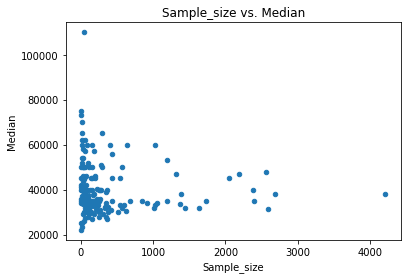

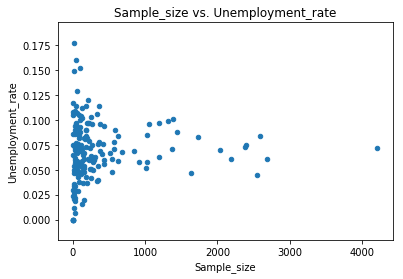

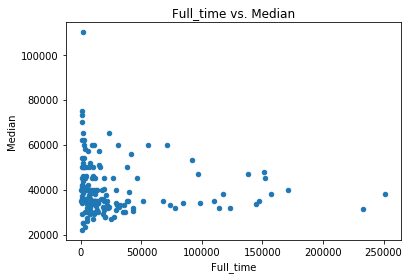

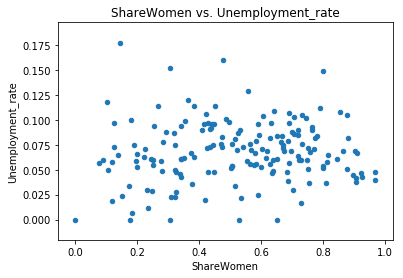

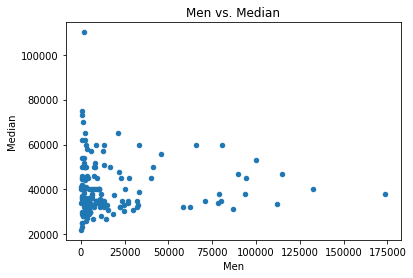

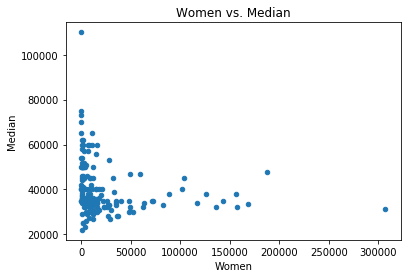

In [9]:
# Done using Dataframe.plot() method
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter', title = 'Sample_size vs. Median')
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter', title = 'Sample_size vs. Unemployment_rate')
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter', title = 'Full_time vs. Median')
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter', title = 'ShareWomen vs. Unemployment_rate')
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter', title = 'Men vs. Median')
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter', title = 'Women vs. Median')

From looking through the scatter plots we can see in the 'ShareWomen vs Unemployment_rate' plot that there is no correlation between unemployment rate and the amount of women in the major.

Lets explore the data further using histograms as it doesn't look like there is much other useful information to be gained from the scatter plots.

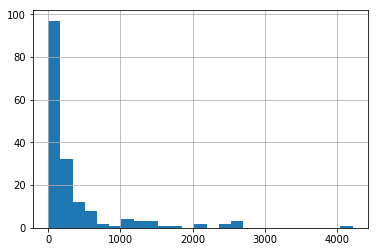

In [10]:
recent_grads['Sample_size'].hist(bins = 25)

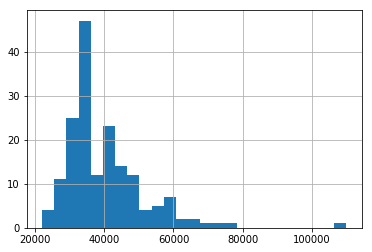

In [11]:
recent_grads['Median'].hist(bins = 25)

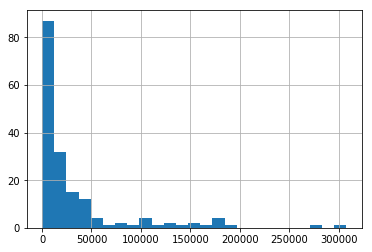

In [12]:
recent_grads['Employed'].hist(bins = 25)

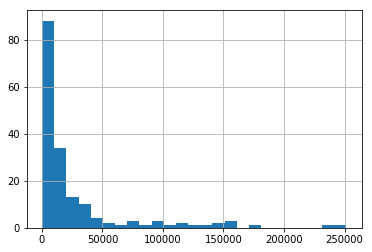

In [13]:
recent_grads['Full_time'].hist(bins = 25)

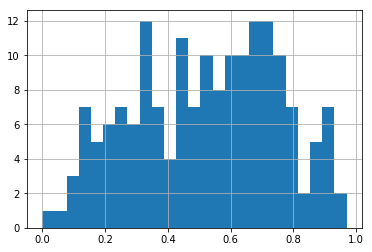

In [14]:
recent_grads['ShareWomen'].hist(bins = 25)

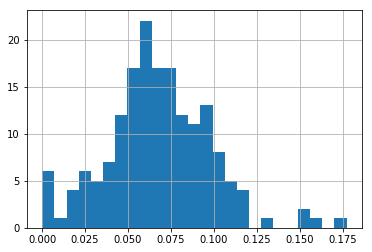

In [15]:
recent_grads['Unemployment_rate'].hist(bins = 25)

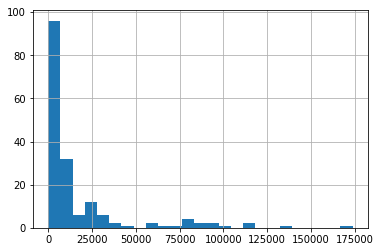

In [16]:
recent_grads['Men'].hist(bins = 25)

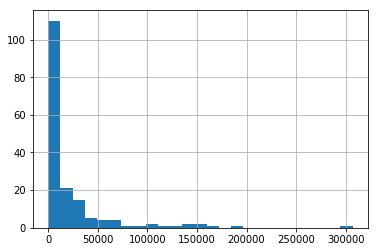

In [17]:
recent_grads['Women'].hist(bins = 25)

Again, not much correlation from these histograms, however we do see a distribution of unemployment rates for various majors. 

Next we'll use scatter matrix from pandas to see if we can draw more insight. A scatter matrix can plot many different variables together and allow us to quickly see if there are correlations between those variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F72338E10>,
      dtype=object)

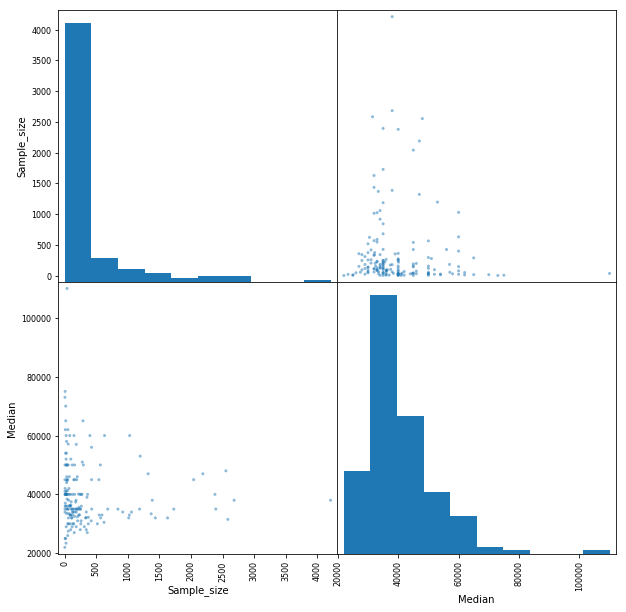

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F72497E10>,
      dtype=object)

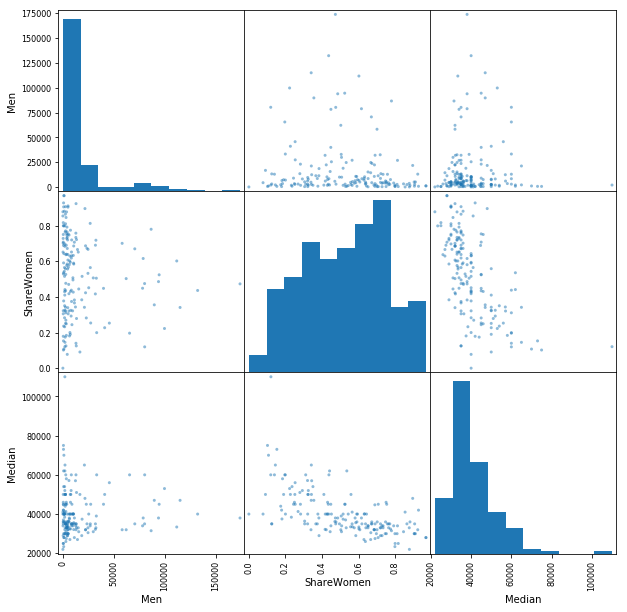

In [19]:
scatter_matrix(recent_grads[['Men', 'ShareWomen', 'Median']], figsize = (10,10))

Not much correlations can be gained from the plots above. We can see that there is a weak negative correlation between 'ShareWomen' and 'Median'. This may suggest that high earning majors tend to have less women.

The first 10 rows of the data set are made up of mostly high paying engineering majors and the last ten rows are non engineering majors. We can generate a bar chart and look at the 'ShareWomen' vs 'Majors' to see if our hypothesis holds.

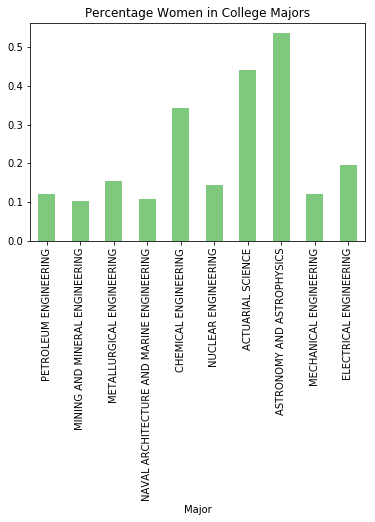

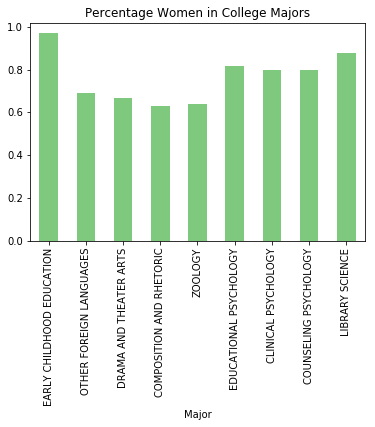

In [20]:
recent_grads[:10].plot(
    kind = 'bar', 
    x = 'Major', 
    y = 'ShareWomen', 
    legend = False, 
    title = 'Percentage Women in College Majors',
    colormap = 'Accent'
)

recent_grads[163:].plot(
    kind = 'bar', 
    x = 'Major', 
    y = 'ShareWomen', 
    legend = False, 
    title = 'Percentage Women in College Majors',
    colormap = 'Accent'
)

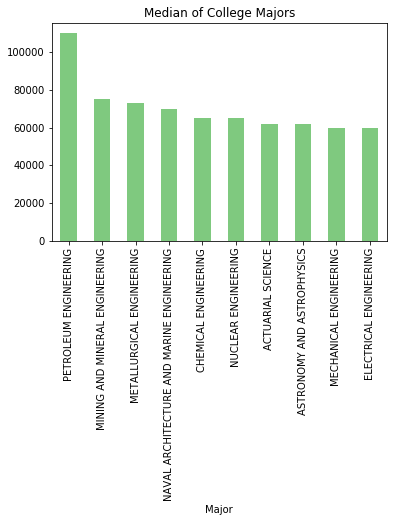

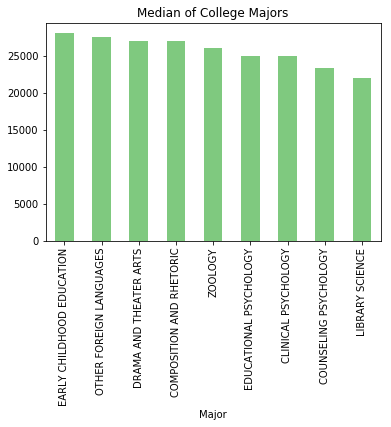

In [21]:
recent_grads[:10].plot(
    kind = 'bar', 
    x = 'Major', 
    y = 'Median', 
    legend = False, 
    title ='Median of College Majors',
    colormap = 'Accent'
)

recent_grads[163:].plot(
    kind = 'bar', 
    x = 'Major', 
    y = 'Median', 
    legend = False, 
    title = 'Median of College Majors',
    colormap = 'Accent'
)

We can see that the share of women is considerably lower than that of men in the engineering majors and we can also see that these engineering majors have a relatively high wage median. When we look at the last 10 rows of the data set we can see that women make up the majority of these majors, however we can see that the wage median for these majors hovers around $30K.

Let's now use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [22]:
major_category = recent_grads.loc[:, 'Total':'Major_category']

# Use Dataframe.groupby() to group the Major categories together and get the sum of men and women for the categories 
major_category = major_category.groupby(major_category['Major_category']).agg(np.sum)

# use DataFrame.reset_index() to reset the index to a list of integers and make Major_category a column again.
major_category.reset_index(inplace = True)

major_category

,Major_category,Total,Men,Women
0,Agriculture & Natural Resources,75620.0,40357.0,35263.0
1,Arts,357130.0,134390.0,222740.0
2,Biology & Life Science,453862.0,184919.0,268943.0
3,Business,1302376.0,667852.0,634524.0
4,Communications & Journalism,392601.0,131921.0,260680.0
5,Computers & Mathematics,299008.0,208725.0,90283.0
6,Education,559129.0,103526.0,455603.0
7,Engineering,537583.0,408307.0,129276.0
8,Health,463230.0,75517.0,387713.0
9,Humanities & Liberal Arts,713468.0,272846.0,440622.0


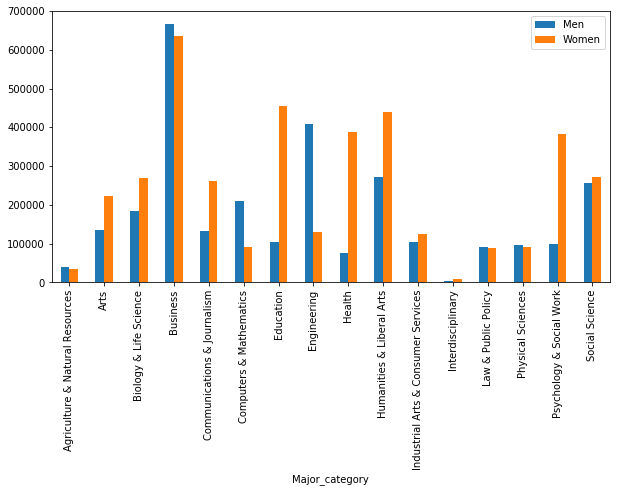

In [23]:
major_category.plot(kind = 'bar', x ='Major_category' , y = ['Men', 'Women'], figsize = (10,5))

From the plot above we can see that men make up the vast majority of students in the Egineering category and are again the majority in the Computers & Mathemathics category. We can also see that Health and the Psychology & Social Work categories are made up of a vast majority of women.